# Calculate $\beta_c$

Given network,  
1. bond percolation
2. get the two largest strongly connected components and their "sout" components
3. calculate four quantities
    - $s_{out}^{1st}$($s_{out}^{\infty}$)
    - std($s_{out}^{\infty}$)/$s_{out}^{\infty}$

In [1]:
WORKSPACEFOLDER = 'E:\Projects\ComplexNetwork'
import os
os.chdir(WORKSPACEFOLDER)

In [6]:
import json

import numpy as np

import src.main.model.network as network
import src.main.util.network.algorithm as algorithm

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [12]:
def main():
    # g_name, betas, times
    with open(f'db/{g_name}/at.json', 'r') as fr:
        at = json.load(fr)
    g = network.DirectedGraph(g_name, at)
    gout_mean, gout_std = [], []
    for beta in betas:
        print(f'{beta:.4f},', end='\t')
        gout_szs = []
        for t in range(times):
            sub_at = g.n_bond_percolation(beta)
            gout = algorithm.Algorithm.get_gout(sub_at)
            gout_szs.append(len(gout))
        gout_szs = np.array(gout_szs)
        gout_mean.append(gout_szs.mean())
        gout_std.append(gout_szs.std())
    return gout_mean, gout_std

## DiSFNetwork4

beta_c = 0.0200

In [17]:
g_name, times = 'DiSFNetwork4', 100
betas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]

In [18]:
gout_mean, gout_std = main()

0.0100,	0.0200,	0.0300,	0.0400,	0.0500,	0.0600,	0.0700,	0.0800,	0.0900,	0.1000,	

<IPython.core.display.Javascript object>


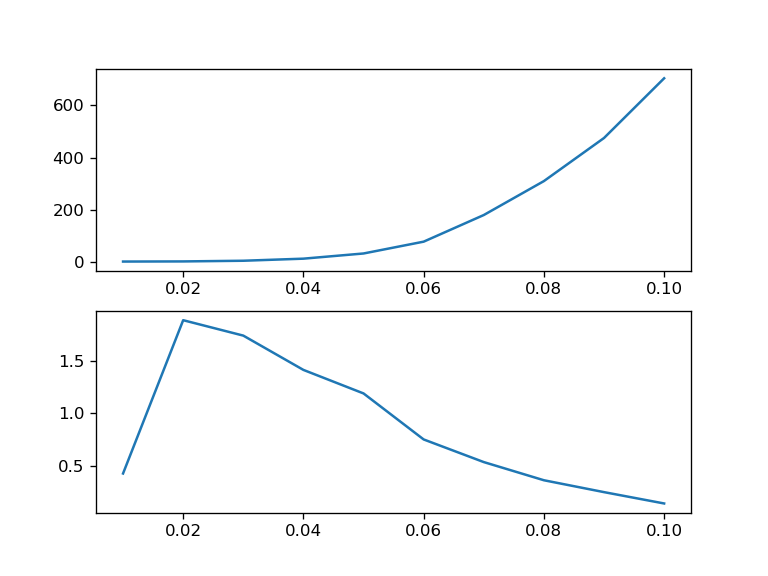

In [19]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(betas, gout_mean)
ax[1].plot(betas, np.array(gout_std) / np.array(gout_mean))

## DiSFNetwork20

beta_c = 0.005

In [20]:
g_name, times = 'DiSFNetwork20', 100
betas = (np.arange(10) + 1) * 0.0010

In [21]:
gout_mean, gout_std = main()

0.0010,	0.0020,	0.0030,	0.0040,	0.0050,	0.0060,	0.0070,	0.0080,	0.0090,	0.0100,	

<IPython.core.display.Javascript object>


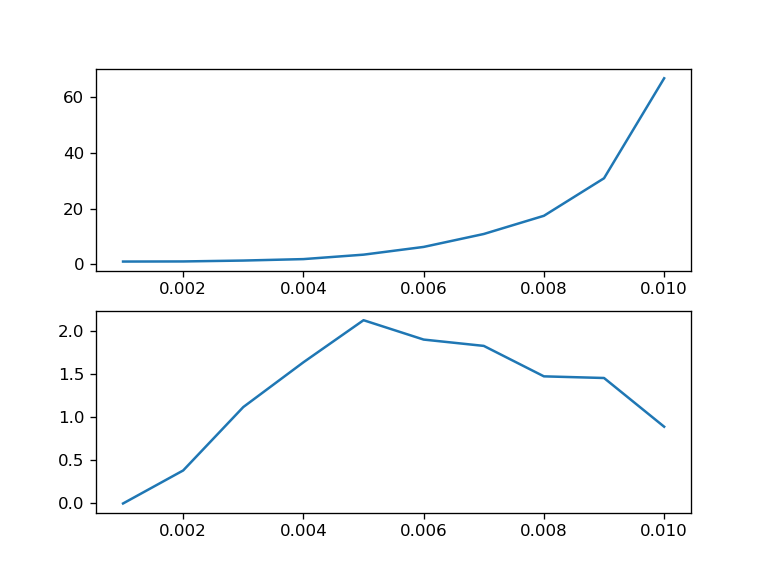

In [22]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(betas, gout_mean)
ax[1].plot(betas, np.array(gout_std) / np.array(gout_mean))

## SNAPTwitter

beta_c = 0.004

In [23]:
g_name, times = 'SNAPTwitter', 100
betas = (np.arange(10) + 3) * 0.0010

In [25]:
gout_mean, gout_std = main()

0.0030,	0.0040,	0.0050,	0.0060,	0.0070,	0.0080,	0.0090,	0.0100,	0.0110,	0.0120,	

<IPython.core.display.Javascript object>


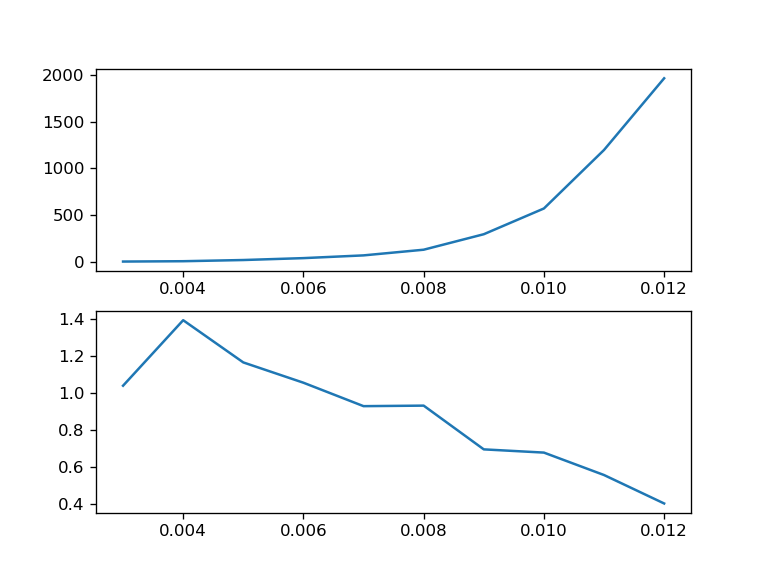

In [26]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(betas, gout_mean)
ax[1].plot(betas, np.array(gout_std) / np.array(gout_mean))